In [554]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)
import re
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from scipy.stats import chi2_contingency

#### Reading and describing data

In [555]:
data = pd.read_csv('creditcardmarketing1.csv')
data.head()

,Customer Number,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
0,1,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0
1,2,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0
2,3,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0
3,4,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0
4,5,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0


In [556]:
#check for duplicate Customer Numbers
sum(data.duplicated())

0

In [557]:
data = data.drop(["Customer Number"], axis=1)

In [558]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Offer Accepted        18000 non-null  object 
 1   Reward                18000 non-null  object 
 2   Mailer Type           18000 non-null  object 
 3   Income Level          18000 non-null  object 
 4   # Bank Accounts Open  18000 non-null  int64  
 5   Overdraft Protection  18000 non-null  object 
 6   Credit Rating         18000 non-null  object 
 7   # Credit Cards Held   18000 non-null  int64  
 8   # Homes Owned         18000 non-null  int64  
 9   Household Size        18000 non-null  int64  
 10  Own Your Home         18000 non-null  object 
 11  Average Balance       17976 non-null  float64
 12  Q1 Balance            17976 non-null  float64
 13  Q2 Balance            17976 non-null  float64
 14  Q3 Balance            17976 non-null  float64
 15  Q4 Balance         

In [559]:
data.describe(include = 'all')

,Offer Accepted,Reward,Mailer Type,Income Level,# Bank Accounts Open,Overdraft Protection,Credit Rating,# Credit Cards Held,# Homes Owned,Household Size,Own Your Home,Average Balance,Q1 Balance,Q2 Balance,Q3 Balance,Q4 Balance
count,18000,18000,18000,18000,18000.000000,18000,18000,18000.000000,18000.000000,18000.000000,18000,17976.000000,17976.000000,17976.000000,17976.000000,17976.000000
unique,2,3,2,3,NaN,2,3,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN
top,No,Air Miles,Postcard,Medium,NaN,No,High,NaN,NaN,NaN,Yes,NaN,NaN,NaN,NaN,NaN
freq,16977,6061,9147,9013,NaN,15322,6071,NaN,NaN,NaN,11655,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,1.255778,NaN,NaN,1.903500,1.203444,3.499056,NaN,940.515562,910.450656,999.392190,1042.033600,810.185803
std,NaN,NaN,NaN,NaN,0.472501,NaN,NaN,0.797009,0.427341,1.114182,NaN,350.297837,620.077060,457.402268,553.452599,559.001365
min,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,1.000000,NaN,48.250000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,1.000000,1.000000,3.000000,NaN,787.500000,392.750000,663.000000,633.000000,363.000000
50%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,3.000000,NaN,1007.000000,772.000000,1032.000000,945.500000,703.000000
75%,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,2.000000,1.000000,4.000000,NaN,1153.250000,1521.000000,1342.000000,1463.000000,1212.000000


In [560]:
for i in data.columns:
    print (i,";",len(data[i].unique()),":",data[i].unique())

Offer Accepted ; 2 : ['No' 'Yes']
Reward ; 3 : ['Air Miles' 'Cash Back' 'Points']
Mailer Type ; 2 : ['Letter' 'Postcard']
Income Level ; 3 : ['High' 'Medium' 'Low']
# Bank Accounts Open ; 3 : [1 2 3]
Overdraft Protection ; 2 : ['No' 'Yes']
Credit Rating ; 3 : ['High' 'Medium' 'Low']
# Credit Cards Held ; 4 : [2 1 3 4]
# Homes Owned ; 3 : [1 2 3]
Household Size ; 8 : [4 5 2 6 3 1 8 9]
Own Your Home ; 2 : ['No' 'Yes']
Average Balance ; 4729 : [1160.75  147.25  276.5  ...  691.   1649.   1427.25]
Q1 Balance ; 2159 : [1669.   39.  367. ... 1122. 2139. 1070.]
Q2 Balance ; 1946 : [ 877.  106.  352. ...   91. 1865. 1824.]
Q3 Balance ; 2282 : [1095.   78.  145. ... 2265. 2045. 1037.]
Q4 Balance ; 2185 : [1002.  366.  242. ... 1946. 2035. 2188.]


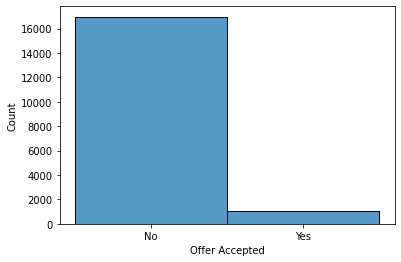

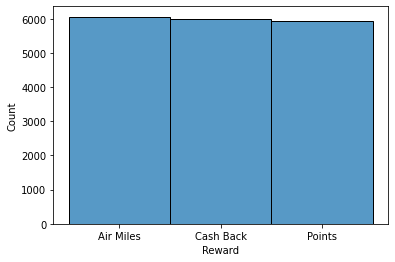

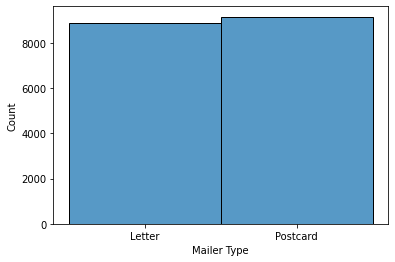

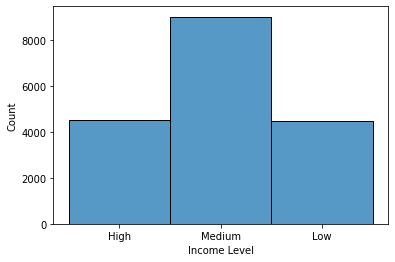

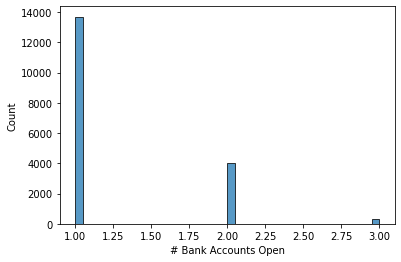

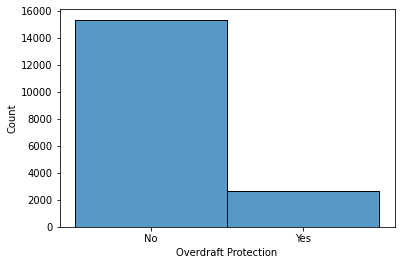

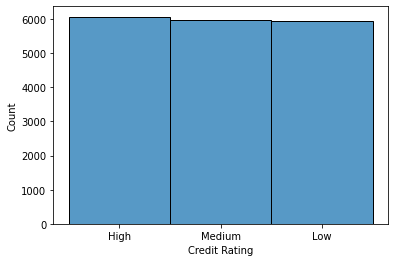

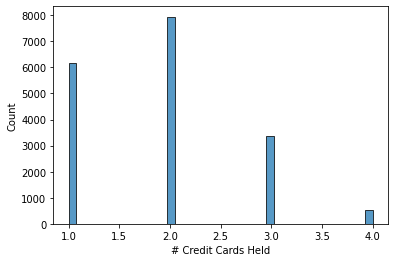

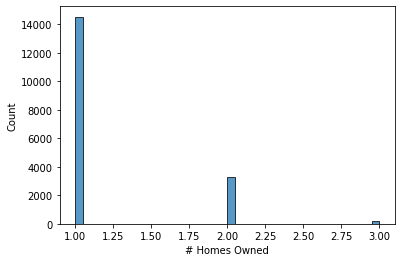

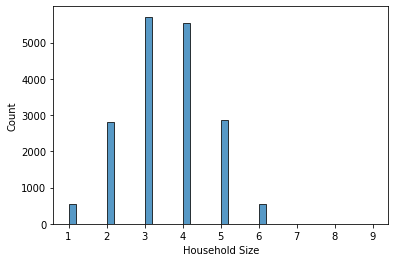

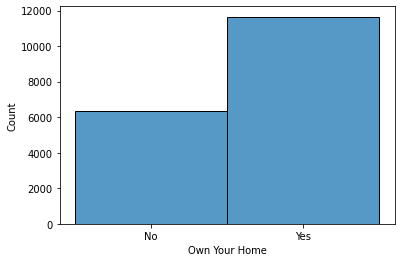

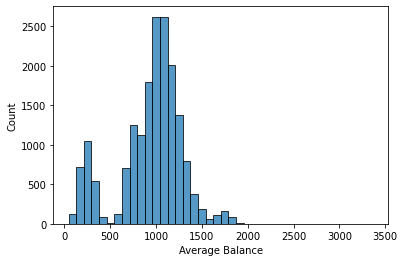

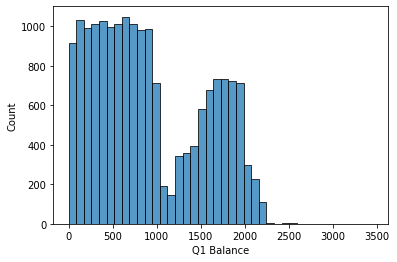

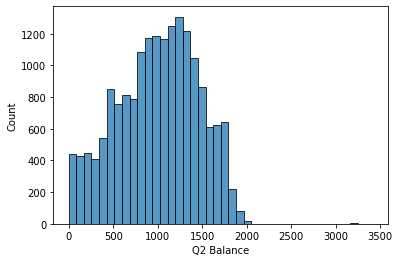

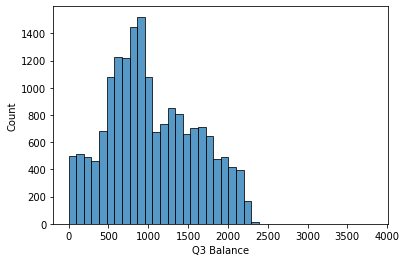

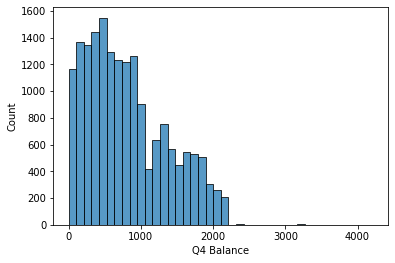

In [561]:
for i in range(data.shape[1]):
    sns.histplot(data[data.columns[i]], bins=40)
    plt.show()

In [601]:
# Imblance in the target variable
data["Offer Accepted"].value_counts()

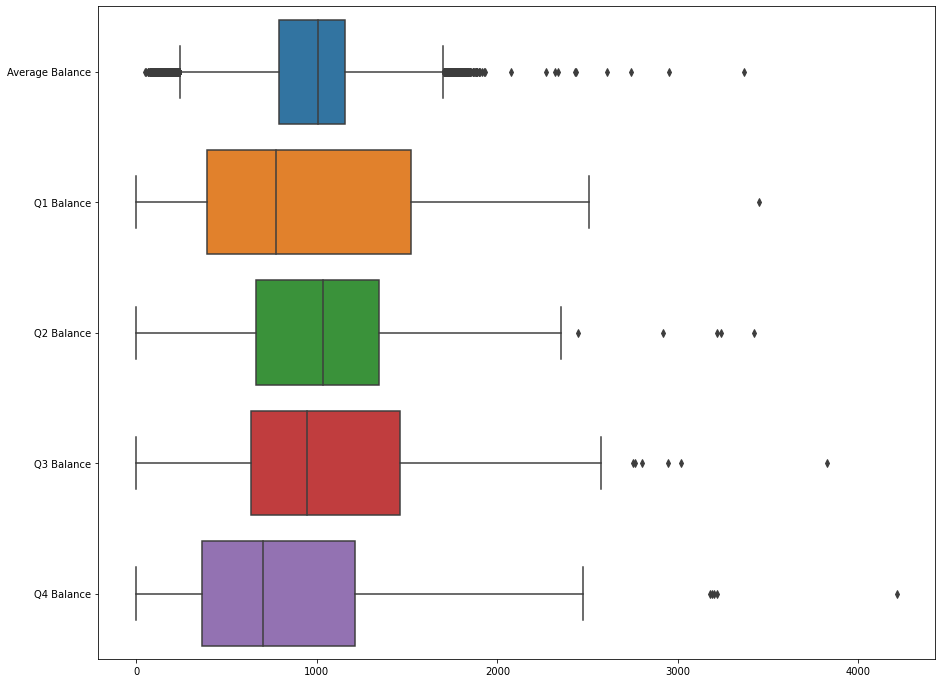

In [563]:
# Draw a boxplot for each numeric variable
plt.figure(figsize=(15,12))
ax = sns.boxplot(data=data.select_dtypes(include=[np.float64]), orient="h")

#### Cleaning column headers


In [564]:
def clean_columns(x):
    if x[0] == '#':
        x = x[2:].lower().strip().replace(' ', '_')
    else:
        x = x.lower().strip().replace(' ', '_')
    return x

data.columns = list(map(clean_columns, data.columns))
data.columns

Index(['offer_accepted', 'reward', 'mailer_type', 'income_level',
       'bank_accounts_open', 'overdraft_protection', 'credit_rating',
       'credit_cards_held', 'homes_owned', 'household_size', 'own_your_home',
       'average_balance', 'q1_balance', 'q2_balance', 'q3_balance',
       'q4_balance'],
      dtype='object')

#### Checking for and replacing null values

In [565]:
data.isnull().sum()/len(data)*100

offer_accepted          0.000000
reward                  0.000000
mailer_type             0.000000
income_level            0.000000
bank_accounts_open      0.000000
overdraft_protection    0.000000
credit_rating           0.000000
credit_cards_held       0.000000
homes_owned             0.000000
household_size          0.000000
own_your_home           0.000000
average_balance         0.133333
q1_balance              0.133333
q2_balance              0.133333
q3_balance              0.133333
q4_balance              0.133333
dtype: float64

In [566]:
# Replace null values with the median

for i in data[["average_balance", "q1_balance", "q2_balance", "q3_balance", "q4_balance"]].columns: #choose the columns with null values
    med = data[i].median()
    data[i] = data[i].fillna(med)

#### Numerical / categorical columns split

In [567]:
cat_columns = []
num_columns = []

for i in data.columns:
    if len(data[i].unique()) > 10:
        num_columns.append(i)
    else:
        cat_columns.append(i)   

In [568]:
num = data[num_columns]
num.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance
0,1160.75,1669.0,877.0,1095.0,1002.0
1,147.25,39.0,106.0,78.0,366.0
2,276.50,367.0,352.0,145.0,242.0
3,1219.00,1578.0,1760.0,1119.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0


In [569]:
for i in num.columns:
    print(num[i].describe())

count    18000.000000
mean       940.604208
std        350.072621
min         48.250000
25%        787.937500
50%       1007.000000
75%       1152.562500
max       3366.250000
Name: average_balance, dtype: float64
count    18000.000000
mean       910.266056
std        619.684111
min          0.000000
25%        393.000000
50%        772.000000
75%       1520.250000
max       3450.000000
Name: q1_balance, dtype: float64
count    18000.000000
mean       999.435667
std        457.098763
min          0.000000
25%        664.000000
50%       1032.000000
75%       1342.000000
max       3421.000000
Name: q2_balance, dtype: float64
count    18000.000000
mean      1041.904889
std        553.094705
min          0.000000
25%        633.000000
50%        945.500000
75%       1462.000000
max       3823.000000
Name: q3_balance, dtype: float64
count    18000.000000
mean       810.042889
std        558.642246
min          0.000000
25%        363.750000
50%        703.000000
75%       1211.000000
max  

In [570]:
cat.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes


#### Checking Multicollinearity
<br>
Numerical variables

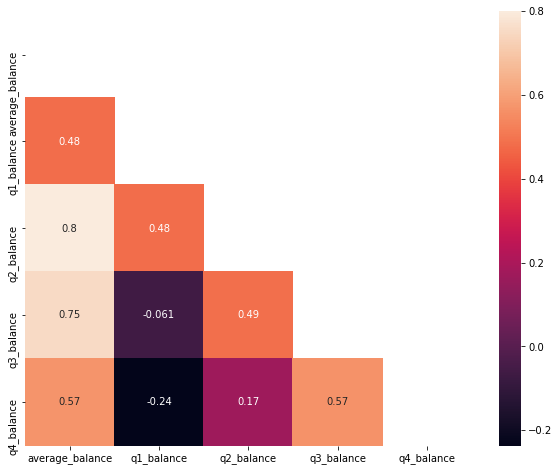

In [571]:
correlations_matrix = num.corr()
mask = np.zeros_like(correlations_matrix)
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [572]:
vif = {}
numer_vif = num
numer_vif= add_constant(num)

In [573]:
for i in np.arange(numer_vif.shape[1]):
    column_name = numer_vif.columns[i]
    value = variance_inflation_factor(np.array(numer_vif), i)
    vif[column_name] = value
vif    

{'const': 8.268845743264167,
 'average_balance': 4447.523660455172,
 'q1_balance': 871.3913136229564,
 'q2_balance': 476.80592208638893,
 'q3_balance': 695.2171601202452,
 'q4_balance': 709.0042955328568}

Very correlated so try and extract the useful information from these columns. 
max_q/min_y are the quarters with the highest and lowest balances
max/min are the highest and lowest balances
range is the range of the balances

In [574]:
def minmax_func(df):
    max_q = df.idxmax(axis=1)
    min_q = df.idxmin(axis=1)
    max_ = df.max(axis=1)
    min_ = df.min(axis=1)
    range_ = (df.max(axis=1))-(df.min(axis=1))
    
    
    df["max_quarter"] = max_q
    df["min_quarter"] = min_q
    df["range"] = range_
    df["max"] = max_
    df["min"] = min_
    
    return df
   
num = minmax_func(num)

In [575]:
#renaming the columns with the quarters
num['max_quarter'] = list(map(lambda x: x[:2],num['max_quarter']))
num['min_quarter'] = list(map(lambda x: x[:2],num['min_quarter']))

In [577]:
#remaining columns from the numerical data
num.head()

,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,max_quarter,min_quarter,range,max,min
0,1160.75,1669.0,877.0,1095.0,1002.0,q1,q2,792.0,1669.0,877.0
1,147.25,39.0,106.0,78.0,366.0,q4,q1,327.0,366.0,39.0
2,276.50,367.0,352.0,145.0,242.0,q1,q3,222.0,367.0,145.0
3,1219.00,1578.0,1760.0,1119.0,419.0,q2,q4,1341.0,1760.0,419.0
4,1211.00,2140.0,1357.0,982.0,365.0,q1,q4,1775.0,2140.0,365.0


Numerical variables

In [578]:
#add new min/max columns to the categorical data and drop from numerical
cat = data[cat_columns]
cat["max_quarter"] = num["max_quarter"]
cat["min_quarter"] = num["min_quarter"]
num = num.drop(["max_quarter", "min_quarter"], axis = 1)

In [579]:
cat.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,max_quarter,min_quarter
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,q1,q2
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,q4,q1
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,q1,q3
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,q2,q4
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,q1,q4


In [580]:
#create new dataframe dropping the target variable
cat2 = cat.drop(['offer_accepted'], axis = 1)
cat2.shape

(18000, 12)

In [581]:
cat2.head()

,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,max_quarter,min_quarter
0,Air Miles,Letter,High,1,No,High,2,1,4,No,q1,q2
1,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,q4,q1
2,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,q1,q3
3,Air Miles,Letter,Medium,2,No,High,1,1,4,No,q2,q4
4,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,q1,q4


In [582]:
#check chi-squared value of all pairs of categorical columns

lst1 = []
lst2 = []
lst3 = []

data_test = pd.DataFrame(cat2.columns)

data_test['sum'] = 0

for i,n in enumerate(cat2.columns):
    x = 1
    while x < len(cat2.columns)-i:
        crosstab = pd.crosstab(cat2[n],cat2[cat2.columns[i+x]])
        lst1.append(n)
        lst2.append(cat2.columns[i+x])
        lst3.append(chi2_contingency(crosstab, correction=False)[1])
        data_test.iloc[i,1] += chi2_contingency(crosstab, correction=False)[1]
        data_test.iloc[i+x,1] += chi2_contingency(crosstab, correction=False)[1]
        x += 1

df = pd.concat([pd.DataFrame(lst1),pd.DataFrame(lst2),pd.DataFrame(lst3)], axis =1)


In [583]:
#check which pairs of columns have a p value of less than 0.05
df[df.iloc[:,2]<0.05] 

,0,0,0
19,mailer_type,max_quarter,0.007761
49,credit_rating,max_quarter,0.008498
50,credit_rating,min_quarter,0.013072
54,credit_cards_held,max_quarter,0.009283
65,max_quarter,min_quarter,0.000000


In [584]:
#check sum of p values for each column
data_test.head(15)

,0,sum
0,reward,5.803371
1,mailer_type,6.389539
2,income_level,6.164435
3,bank_accounts_open,5.320505
4,overdraft_protection,4.376775
5,credit_rating,4.944851
6,credit_cards_held,6.761340
7,homes_owned,7.067137
8,household_size,5.361124
9,own_your_home,5.108094


In [585]:
#remove the column with higher total p from pairs with p<0.05
chi_score = min(df.iloc[:,2])
while chi_score < 0.05:
    min_score = min(df.iloc[:,2])
    col_1 = df[df.iloc[:,2] == min_score].iloc[0,0]
    col_2 = df[df.iloc[:,2] == min_score].iloc[0,1]
    if data_test[data_test.iloc[:,0]==col_1].iloc[0,1] >= data_test[data_test.iloc[:,0]==col_2].iloc[0,1]:
        del_col = col_2
    else:
        del_col = col_1
    df = df[df.iloc[:,0] != del_col]
    df = df[df.iloc[:,1] != del_col]
    chi_score = min(df.iloc[:,2])

In [586]:
#p values of remaining pairs of columns
df

,0,0,0
0,reward,mailer_type,0.638096
1,reward,income_level,0.627896
2,reward,bank_accounts_open,0.052374
3,reward,overdraft_protection,0.467375
4,reward,credit_rating,0.677843
5,reward,credit_cards_held,0.443031
6,reward,homes_owned,0.816238
7,reward,household_size,0.824041
8,reward,own_your_home,0.382907
11,mailer_type,income_level,0.579700


In [587]:
#drop "max_quarter" and "min_quarter" from main dataset as they were dropped by the previous function
cat = cat.drop(["max_quarter", "min_quarter"], axis=1)
cat.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes


In [588]:
#combine numerical and categorical columns after multicollinearity checks
data_clean = pd.concat([cat, num], axis =1)

In [589]:
data_clean.head()

,offer_accepted,reward,mailer_type,income_level,bank_accounts_open,overdraft_protection,credit_rating,credit_cards_held,homes_owned,household_size,own_your_home,average_balance,q1_balance,q2_balance,q3_balance,q4_balance,range,max,min
0,No,Air Miles,Letter,High,1,No,High,2,1,4,No,1160.75,1669.0,877.0,1095.0,1002.0,792.0,1669.0,877.0
1,No,Air Miles,Letter,Medium,1,No,Medium,2,2,5,Yes,147.25,39.0,106.0,78.0,366.0,327.0,366.0,39.0
2,No,Air Miles,Postcard,High,2,No,Medium,2,1,2,Yes,276.50,367.0,352.0,145.0,242.0,222.0,367.0,145.0
3,No,Air Miles,Letter,Medium,2,No,High,1,1,4,No,1219.00,1578.0,1760.0,1119.0,419.0,1341.0,1760.0,419.0
4,No,Air Miles,Letter,Medium,1,No,Medium,2,1,6,Yes,1211.00,2140.0,1357.0,982.0,365.0,1775.0,2140.0,365.0


#### Checking multicollinearity - Numerical/Categorical

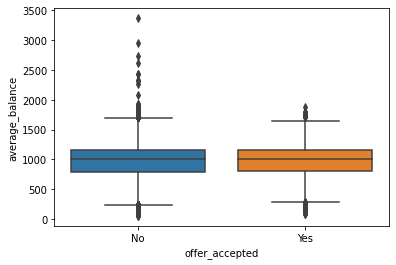

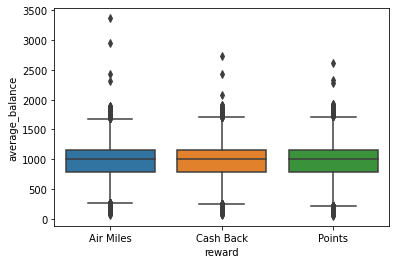

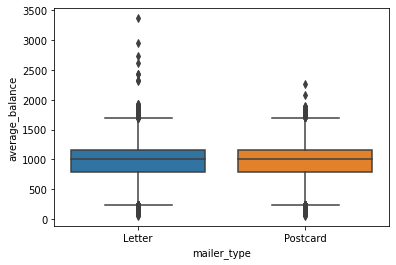

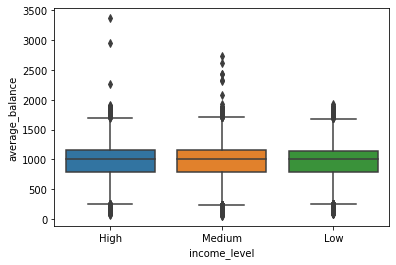

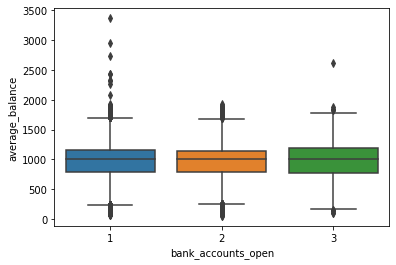

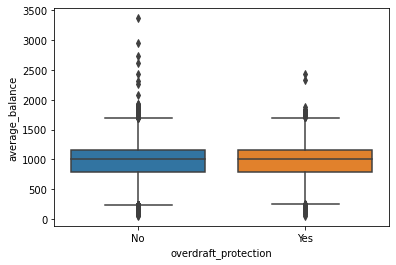

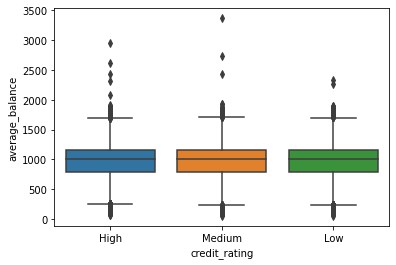

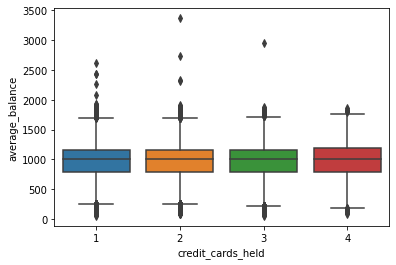

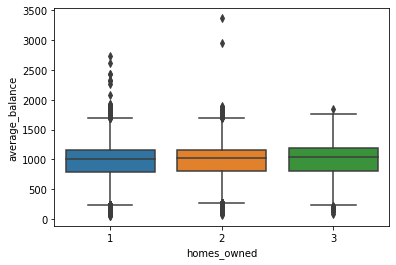

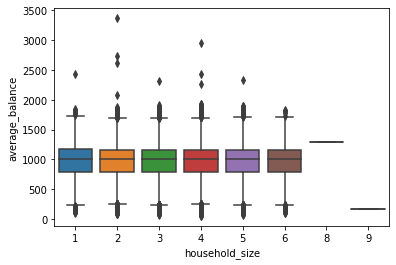

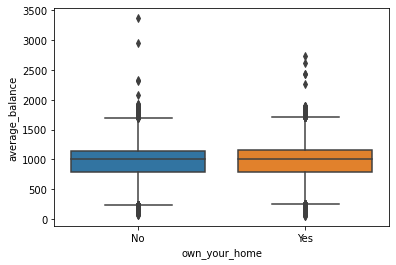

In [590]:
#check Average Balance against categorical values
for i in cat:
    sns.boxplot(x=i, y="average_balance", data = data_clean)
    plt.show()

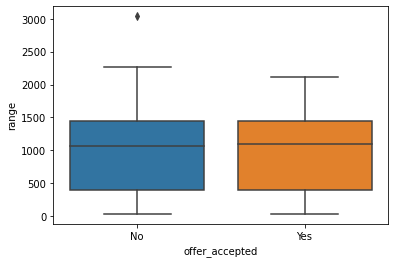

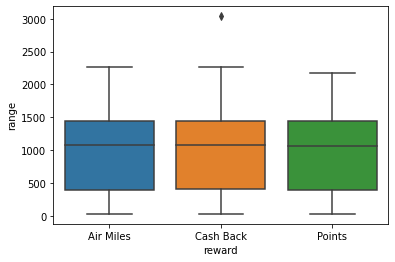

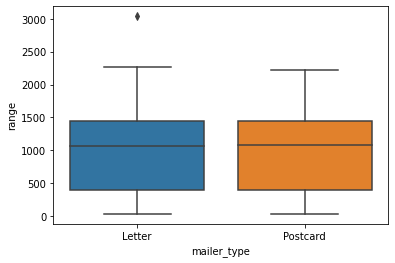

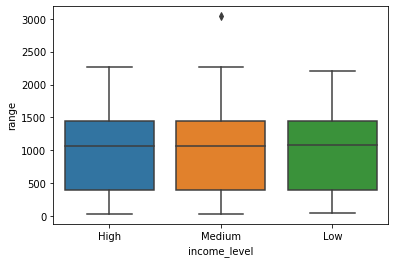

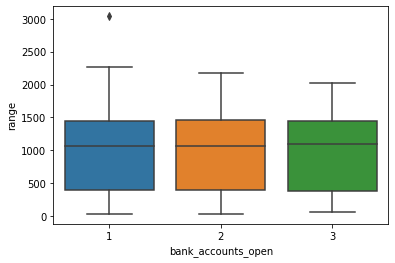

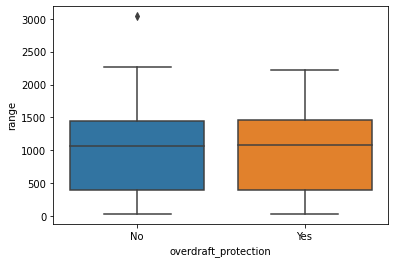

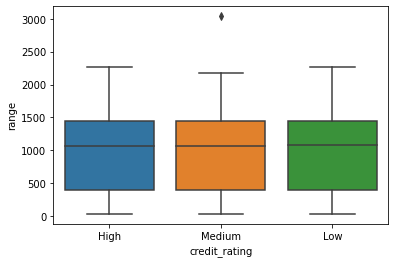

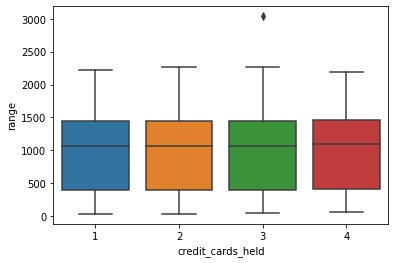

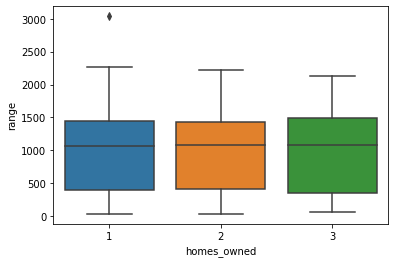

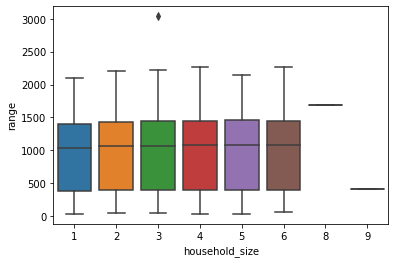

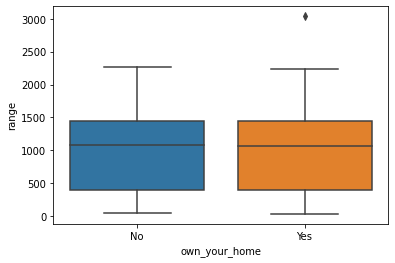

In [591]:
#Check range against categorical values
for i in cat:
    sns.boxplot(x=i, y="range", data = data_clean)
    plt.show()

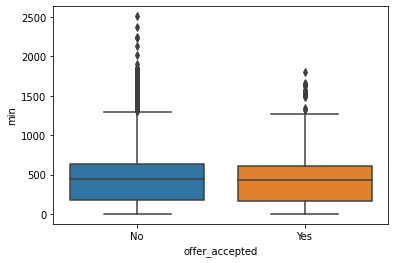

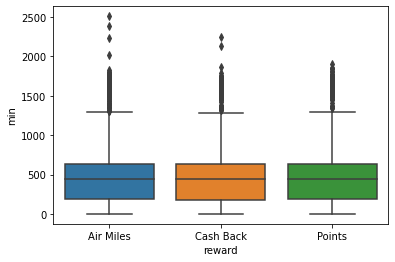

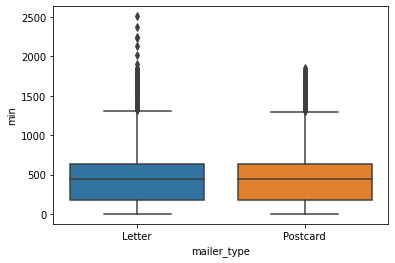

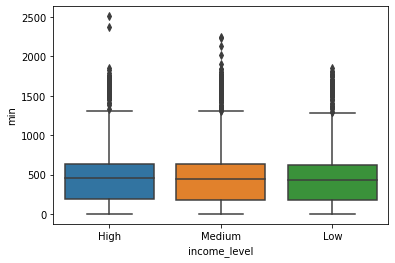

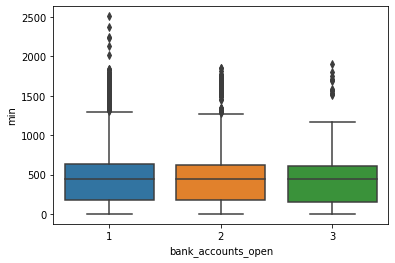

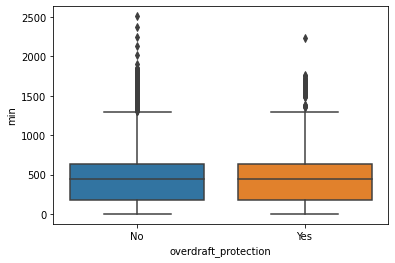

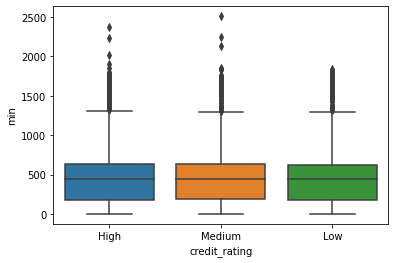

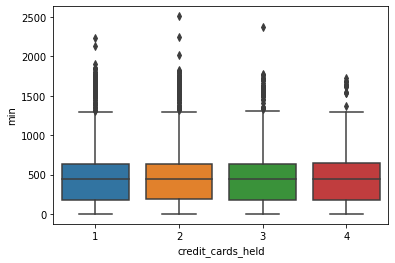

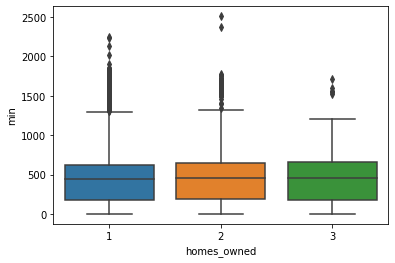

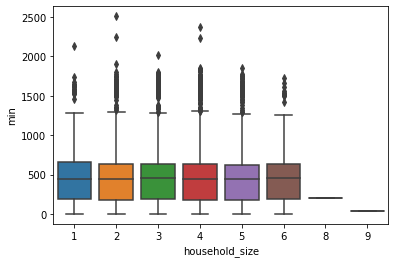

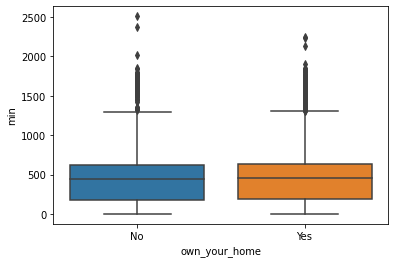

In [592]:
#check min against categorical values
for i in cat:
    sns.boxplot(x=i, y="min", data = data_clean)
    plt.show()

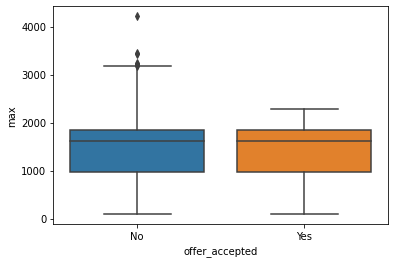

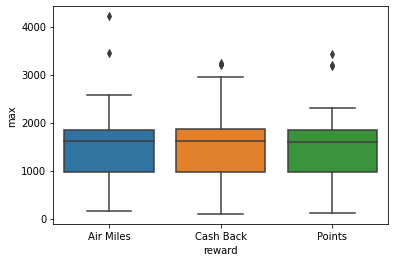

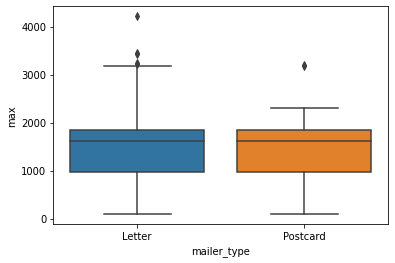

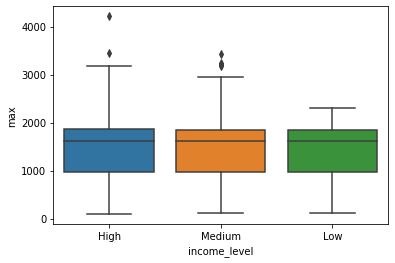

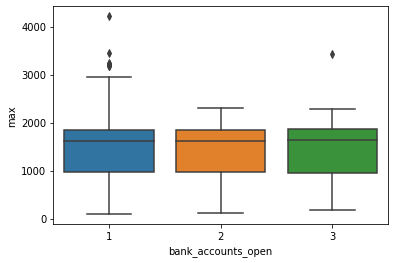

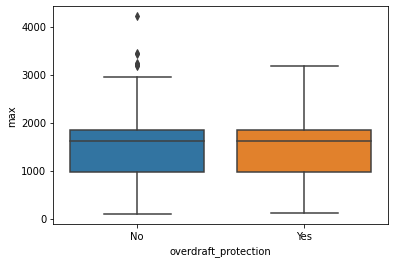

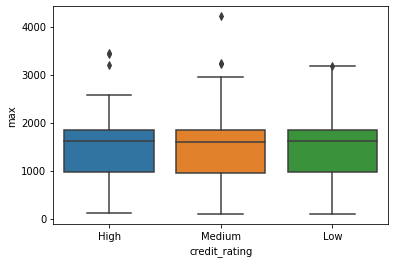

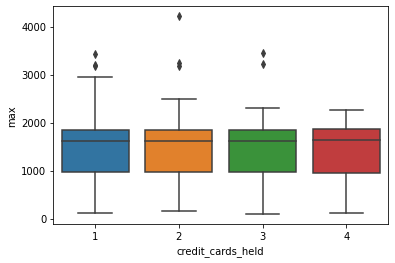

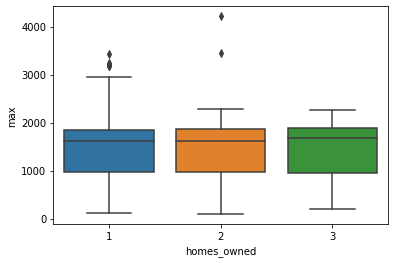

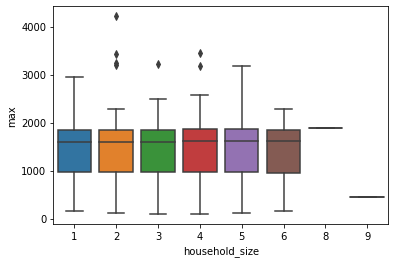

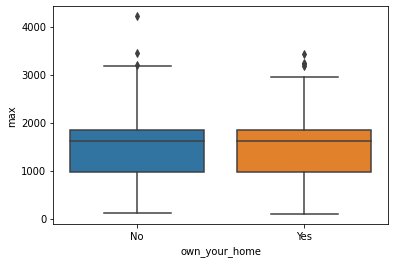

In [593]:
#check max against categorical values
for i in cat:
    sns.boxplot(x=i, y="max", data = data_clean)
    plt.show()

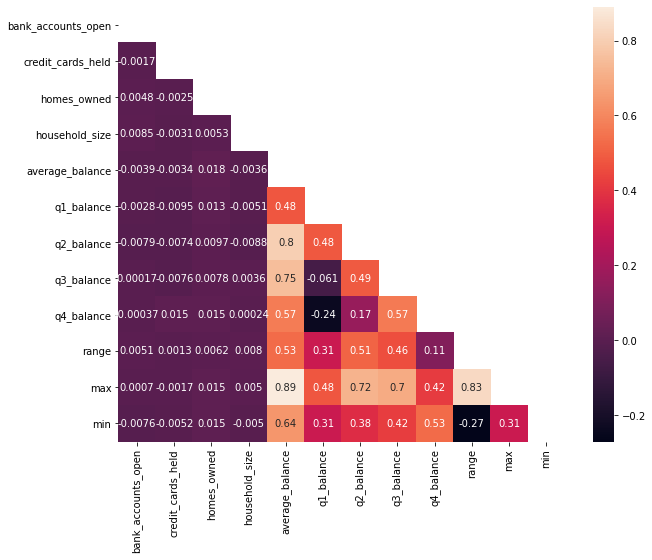

In [594]:
#check new numerical columns (min, max, range) against all numerical columns
correlations_matrix = data_clean.corr()
mask = np.zeros_like(correlations_matrix) 
mask[np.triu_indices_from(mask)] = True
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations_matrix, mask=mask, annot=True)
plt.show()

In [595]:
#"max" correlates strongly with avg balance and range so remove
#data_clean = data_clean.drop(["max"], axis = 1)

#### Categorical data - group values to reduce no. of columns

In [596]:
#Replacing low frequency values in household_size and clustering them under value=6
data_clean['household_size'] = data_clean['household_size'].apply(lambda x: 6 if x>6 else x)


<AxesSubplot:xlabel='bank_accounts_open', ylabel='count'>

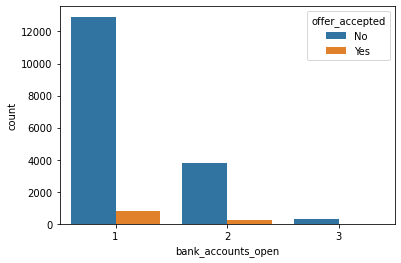

In [597]:
#checking other columns with multiple values to decide whether to group or keep all categories
sns.countplot(x = 'bank_accounts_open', hue = 'offer_accepted', data = data_clean)

<AxesSubplot:xlabel='credit_cards_held', ylabel='count'>

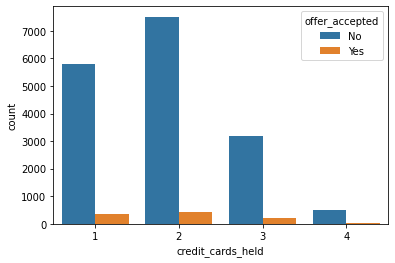

In [598]:
sns.countplot(x = 'credit_cards_held', hue = 'offer_accepted', data = data_clean)

In [599]:
#export cleaned data to csv
data_clean.to_csv('data_clean.csv', index=False)